# Pose Estimation

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
# pretrained weights
net = cv.dnn.readNetFromTensorflow('/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/human-pose-estimation-opencv-master/graph_opt.pb')

In [ ]:
# 19개의 body parts(in 스켈레톤)
BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                   "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                   "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
                   "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }  

# Connected pair(이대로 연결됨)
POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
                   ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
                   ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
                   ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
                   ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

In [ ]:
len(BODY_PARTS)

19

In [ ]:
# png format
# img = cv.imread('/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/human-pose-estimation-opencv-master/image.jpg')

# img = cv.imread('/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/human-pose-estimation-opencv-master/style_5971c229e81ec.jpg')

# img = cv.imread('/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/human-pose-estimation-opencv-master/SSI_20190730095120.jpg')

img = cv.imread('/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/human-pose-estimation-opencv-master/247C1033564D870A03.png')

img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/human-pose-estimation-opencv-master/i1.jpg')
img2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/human-pose-estimation-opencv-master/i2.jpg')
img3 = cv.imread('/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/human-pose-estimation-opencv-master/i3.jpeg')
img4 = cv.imread('/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/human-pose-estimation-opencv-master/i4.jpg')

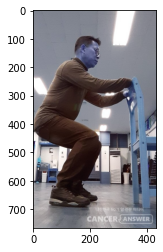

In [ ]:
plt.imshow(img1)  # bgr(blue, green, red)이므로 rgb로 바꿔주기

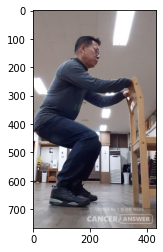

In [ ]:
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB)) # rgb로 바뀜

In [ ]:
inWidth = 368
inHeight = 368
thr = 0.2

In [ ]:
def pose_estimation(frame):
  frameWidth = frame.shape[1]
  frameHeight = frame.shape[0]
  net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop = False)) 
  # 1.0 : 스케일링 # 255/2 = 127.5(averaging all of them 255) # swapRB : bgr > rgb로 바꿈

  out = net.forward()
  out = out[:, :19, :, :]  # 19개의 body parts

  assert(len(BODY_PARTS) <= out.shape[1])  # len(BODY_PARTS) = 19(body point)

  points = [] # 리스트에 담음

  for i in range(len(BODY_PARTS)):  # 19개의 body parts

      # Slice heatmap (관련있는 body parts로 heatmap을 자른다)
      heatMap = out[0, i, :, :]

      # Originally, we try to find all the local maximums. To simplify a sample
      # we just find a global one. However only a single pose at the same time
      # could be detected this way.  # (global min을 탐지하려는 방식으로는 하나의 포즈만 탐지할 수 있음)

      _, conf, _, point = cv.minMaxLoc(heatMap)
      x = (frameWidth * point[0]) / out.shape[3] # 모든 가능한 possible maximum point를 찾는다
      y = (frameHeight * point[1]) / out.shape[2]

      # Add a point if it's confidence is higher than threshold.
      points.append((int(x), int(y)) if conf > thr else None)  # 위에서 찾은 모든 가능한 point를 append한다

  # pair them(찾은 point들을 join한다)
  for pair in POSE_PAIRS:
      partFrom = pair[0]
      partTo = pair[1]
      assert(partFrom in BODY_PARTS) # 각 part들을 body parts에서 가져오는 조건
      assert(partTo in BODY_PARTS)

      idFrom = BODY_PARTS[partFrom]
      idTo = BODY_PARTS[partTo]

      # join한 point들을 그린다
      if points[idFrom] and points[idTo]:
          cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3) # (0, 255, 0) : green
          cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED) # (0, 0, 255) : red
          cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

  t, _ = net.getPerfProfile()
  freq = cv.getTickFrequency() / 1000
  cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
  return frame

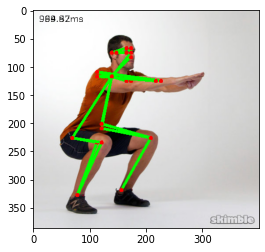

In [ ]:
from google.colab.patches import cv2_imshow  # imshow는 colab에서 충돌하는 경우도 있음. 그땐 이거 해주면 됨!

estimated_image = pose_estimation(img) # 함수 실행
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB)) 

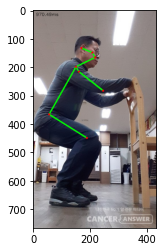

In [ ]:
estimated_image = pose_estimation(img1) # 함수 실행
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB)) 

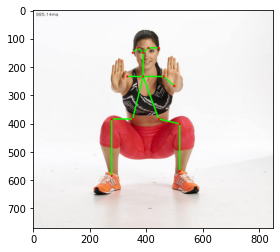

In [ ]:
estimated_image = pose_estimation(img2) # 함수 실행
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB)) 

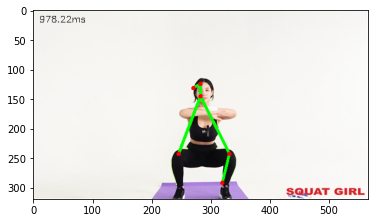

In [ ]:
estimated_image = pose_estimation(img3) # 함수 실행
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB)) 

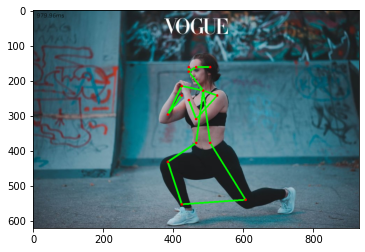

In [ ]:
estimated_image = pose_estimation(img4) # 함수 실행
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB)) 

### Perform on video(3d)

In [ ]:
cap = cv.VideoCapture('/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/human-pose-estimation-opencv-master/video.mp4') # read video

# cap.set(3, 800) # 3: index, 800 : video size
# cap.set(4, 800) # resize(선택적)

# 비디오가 열리지 않을 때 예외처리
if not cap.isOpened():
  cap = cv.VideoCapture(0)

if not cap.isOpened():
  raise IOError('Cannot open video')

# infinite root
while cv.waitKey(1)<0:
  hasFrame, frame = cap.read() # video를 frame by frame으로 읽기(이미지 by 이미지로 읽기)
  if not hasFrame:
    cv.waitKey()
    break

  ##### copy ######

  frameWidth = frame.shape[1]
  frameHeight = frame.shape[0]
  net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop = False)) 
  # 1.0 : 스케일링 # 255/2 = 127.5(averaging all of them 255) # swapRB : bgr > rgb로 바꿈

  out = net.forward()
  out = out[:, :19, :, :]  # 19개의 body parts

  assert(len(BODY_PARTS) <= out.shape[1])  # len(BODY_PARTS) = 19(body point)

  points = [] # 리스트에 담음

  for i in range(len(BODY_PARTS)):  # 19개의 body parts

      # Slice heatmap (관련있는 body parts로 heatmap을 자른다)
      heatMap = out[0, i, :, :]

      # Originally, we try to find all the local maximums. To simplify a sample
      # we just find a global one. However only a single pose at the same time
      # could be detected this way.  # (global min을 탐지하려는 방식으로는 하나의 포즈만 탐지할 수 있음)

      _, conf, _, point = cv.minMaxLoc(heatMap)
      x = (frameWidth * point[0]) / out.shape[3] # 모든 가능한 possible maximum point를 찾는다
      y = (frameHeight * point[1]) / out.shape[2]

      # Add a point if it's confidence is higher than threshold.
      points.append((int(x), int(y)) if conf > thr else None)  # 위에서 찾은 모든 가능한 point를 append한다

  # pair them(찾은 point들을 join한다)
  for pair in POSE_PAIRS:
      partFrom = pair[0]
      partTo = pair[1]
      assert(partFrom in BODY_PARTS) # 각 part들을 body parts에서 가져오는 조건
      assert(partTo in BODY_PARTS)

      idFrom = BODY_PARTS[partFrom]
      idTo = BODY_PARTS[partTo]

      # join한 point들을 그린다
      if points[idFrom] and points[idTo]:
          cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3) # (0, 255, 0) : green
          cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED) # (0, 0, 255) : red
          cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

  t, _ = net.getPerfProfile()
  freq = cv.getTickFrequency() / 1000
  cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

  cv2_imshow(frame)


Output hidden; open in https://colab.research.google.com to view.

## Realtime

In [ ]:
cap = cv.VideoCapture(1) # read video

cap.set(cv.CAP_PROP_FPS, 10)
cap.set(3, 800) # 3: index, 800 : video size
cap.set(4, 800) # resize(선택적)

# 비디오가 열리지 않을 때 예외처리
if not cap.isOpened():
  cap = cv.VideoCapture(0)

if not cap.isOpened():
  raise IOError('Cannot open webcame')

# infinite root
while cv.waitKey(1)<0:
  hasFrame, frame = cap.read() # video를 frame by frame으로 읽기(이미지 by 이미지로 읽기)
  if not hasFrame:
    cv.waitKey()
    break

  ##### copy ######

  frameWidth = frame.shape[1]
  frameHeight = frame.shape[0]
  net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop = False)) 
  # 1.0 : 스케일링 # 255/2 = 127.5(averaging all of them 255) # swapRB : bgr > rgb로 바꿈

  out = net.forward()
  out = out[:, :19, :, :]  # 19개의 body parts

  assert(len(BODY_PARTS) <= out.shape[1])  # len(BODY_PARTS) = 19(body point)

  points = [] # 리스트에 담음

  for i in range(len(BODY_PARTS)):  # 19개의 body parts

      # Slice heatmap (관련있는 body parts로 heatmap을 자른다)
      heatMap = out[0, i, :, :]

      # Originally, we try to find all the local maximums. To simplify a sample
      # we just find a global one. However only a single pose at the same time
      # could be detected this way.  # (global min을 탐지하려는 방식으로는 하나의 포즈만 탐지할 수 있음)

      _, conf, _, point = cv.minMaxLoc(heatMap)
      x = (frameWidth * point[0]) / out.shape[3] # 모든 가능한 possible maximum point를 찾는다
      y = (frameHeight * point[1]) / out.shape[2]

      # Add a point if it's confidence is higher than threshold.
      points.append((int(x), int(y)) if conf > thr else None)  # 위에서 찾은 모든 가능한 point를 append한다

  # pair them(찾은 point들을 join한다)
  for pair in POSE_PAIRS:
      partFrom = pair[0]
      partTo = pair[1]
      assert(partFrom in BODY_PARTS) # 각 part들을 body parts에서 가져오는 조건
      assert(partTo in BODY_PARTS)

      idFrom = BODY_PARTS[partFrom]
      idTo = BODY_PARTS[partTo]

      # join한 point들을 그린다
      if points[idFrom] and points[idTo]:
          cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3) # (0, 255, 0) : green
          cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED) # (0, 0, 255) : red
          cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

  t, _ = net.getPerfProfile()
  freq = cv.getTickFrequency() / 1000
  cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

  cv2_imshow(frame)

OSError: ignored

# Fast pose

In [1]:
# git clone
!git clone https://github.com/ZexinChen/FastPose.git 

Cloning into 'FastPose'...
remote: Enumerating objects: 78, done.
remote: Total 78 (delta 0), reused 0 (delta 0), pack-reused 78
Unpacking objects: 100% (78/78), done.


In [2]:
ls -ltr

total 12
drwxr-xr-x 1 root root 4096 Dec 21 17:29 sample_data/
drwx------ 4 root root 4096 Jan  2 12:04 drive/
drwxr-xr-x 8 root root 4096 Jan  2 12:05 FastPose/


In [3]:
# module import
import sys
# sys.path.append('/content/FastPose/network')
# sys.path.append('/content/FastPose/demo')
# sys.path.append('/content/FastPose/evaluate')
# sys.path.append('/content/FastPose/training')
sys.path.append('/content/FastPose')

In [4]:
from os.path import join
from importlib.machinery import SourceFileLoader
somemodule = SourceFileLoader('somelib', join('/content/FastPose', 
'/content/FastPose/network/fastpose.py')).load_module()

In [5]:
import os
import re
import sys

import cv2
import math
import time
import scipy
import argparse
import matplotlib
import numpy as np
import pylab as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from collections import OrderedDict
from scipy.ndimage.filters import gaussian_filter

import matplotlib
%matplotlib inline
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from network.fastpose import get_model
from training.datasets.coco_data.preprocessing import (inception_preprocess,
                                              rtpose_preprocess,
                                              ssd_preprocess, vgg_preprocess)
from network import im_transform
from evaluate.coco_eval import get_multiplier, get_outputs_test, handle_paf_and_heat_test
import evaluate.coco_eval

import network.post
import demo.utils_eval 
import network.post

os.environ["CUDA_VISIBLE_DEVICES"] = '6'

In [6]:
color = []
for i in range(0,255,80):
    for j in range(0,255,80):
        for k in range(0,255,80):
            color.append((i,j,k))
coco_ann = { 'nose':0, 'neck':1, 'right_shoulder' :2, 'right_elbow' :3, 'right_wrist':4, 
             'left_shoulder':5, 'left_elbow':6, 'left_wrist':7, 'right_hip':8, 
             'right_knee':9, 'right_ankle':10, 'left_hip':11, 'left_knee':12, 
             'left_ankle':13, 'right_eye':14, 'left_eye':15, 'right_ear':16, 
             'left_ear':17 }
coco_ann_r = dict(zip(coco_ann.values(), coco_ann.keys()))
coco_middle = {'nose--left_eye':0,'nose--right_eye':1,'left_eye--left_ear':2,'right_eye--right_ear':3,
               'nose--neck':5,'left_shoulder--left_elbow':6,
               'right_shoulder--right_elbow':7,'left_elbow--left_wrist':8,'right_elbow--right_wrist':9,
               'left_hip--right_hip':10,'left_shoulder--left_hip':11,'right_shoulder--right_hip':12,
               'left_hip--left_knee':13,'right_hip--right_knee':14,'left_knee--left_ankle':15,'right_knee--right_ankle':16,
               'neck--left_shoulder':4,'neck--right_shoulder':17,
               'background':18}
coco_middle_r = dict(zip(coco_middle.values(), coco_middle.keys()))

def persons_jointForm(persons):
    persons_forJoint = []
    for person_idx in range(len(persons)):
        pj = [[] for i in range(18)]
        for point_idx in range(len(persons[person_idx])):
            pj[int(persons[person_idx][point_idx][4])] = persons[person_idx][point_idx]
        persons_forJoint.append(pj)
    return persons_forJoint

In [ ]:
# colab에서 cuda
torch.cuda.is_available()

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

In [ ]:
!nvcc --version

In [7]:
weight_name = '/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/fastpose.pth'

model = get_model('vgg19')     
# model.load_state_dict(torch.load(weight_name))
old_state_dict = torch.load(weight_name, map_location=lambda storage, loc: storage)
new_state_dict = OrderedDict()
for k, v in old_state_dict.items():
    new_state_dict[k[7:]] = v
model_dict = model.state_dict()
model_dict.update(new_state_dict)
model.load_state_dict(model_dict)

# model.cuda()
model.float()
model.eval()

Bulding VGG19


rtpose_model(
  (model0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1

CUDA 지원을 위해

In [10]:
!nvidia-smi

Sat Jan  2 12:14:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    22W / 300W |      0MiB / 16130MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [11]:
import torch
torch.cuda.is_available()

False

In [15]:
# uninstall
!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove
!apt-get update

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'nvidia-kernel-common-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-325-updates' for glob 'nvidia*'
Note, selecting 'nvidia-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-binary' for glob 'nvidia*'
Note, selecting 'nvidia-331-dev' for glob 'nvidia*'
Note, selecting 'nvidia-304-updates-dev' for glob 'nvidia*'
Note, selecting 'nvidia-compute-utils-418-server' for glob 'nvidia*'
Note, selecting 'nvidia-384-dev' for glob 'nvidia*'
Note, selecting 'nvidia-libopencl1-346-updates' for glob 'nvidia*'
Note, selecting 'nvidia-driver-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-340-updates-uvm' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-common' for glob 'nvidia*'
Note, selecting 'nvidia-kernel-source-440-server' for glob 'nvidia*'
Note, selecting 'nvidia-331-updates-uvm' for glob 'nvidi

In [16]:
# install
!wget https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64 -O cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb
!apt-key add /var/cuda-repo-9-2-local/7fa2af80.pub
!apt-get update
!apt-get install cuda-9.2

--2021-01-02 12:18:51--  https://developer.nvidia.com/compute/cuda/9.2/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64
Resolving developer.nvidia.com (developer.nvidia.com)... 152.199.16.29
Connecting to developer.nvidia.com (developer.nvidia.com)|152.199.16.29|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?5wp0rEQJ5N8Vxkm5JE_8a0-NKl0fg0EtftW8kiSPjCoHVBh6H6g7MGRihlg2qUwOUL00kt8PJrkTY8FB3FW5CHg6Bc3_dLBPUDfLJyq5qzNDK6TlWBkLUuq5ZjllpPsbL89zINFOcJeJTEpHQM2mFtfHM5UCiACq1bwcpz8PhP4mhlz4QIsY0eUqgoDWpPHkc_SPBr3iYgEMYLRX5do [following]
--2021-01-02 12:18:52--  https://developer.download.nvidia.com/compute/cuda/9.2/secure/Prod/local_installers/cuda-repo-ubuntu1604-9-2-local_9.2.88-1_amd64.deb?5wp0rEQJ5N8Vxkm5JE_8a0-NKl0fg0EtftW8kiSPjCoHVBh6H6g7MGRihlg2qUwOUL00kt8PJrkTY8FB3FW5CHg6Bc3_dLBPUDfLJyq5qzNDK6TlWBkLUuq5Zj

In [17]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Wed_Apr_11_23:16:29_CDT_2018
Cuda compilation tools, release 9.2, V9.2.88


In [18]:
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-e_meyfij
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-e_meyfij
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-cp36-none-any.whl size=4308 sha256=6cccf5e809094c951aca3cbfcd36a5f1c0214fb7c7ca5a8b71ce76ae1b6def2e
  Stored in directory: /tmp/pip-ephem-wheel-cache-padnblkg/wheels/10/c2/05/ca241da37bff77d60d31a9174f988109c61ba989e4d4650516
Successfully built NVCCPlugin


In [19]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


In [20]:
%%cu
#include <stdio.h>
#include <stdlib.h>
__global__ void add(int *a, int *b, int *c) {
*c = *a + *b;
}
int main() {
int a, b, c;
// host copies of variables a, b & c
int *d_a, *d_b, *d_c;
// device copies of variables a, b & c
int size = sizeof(int);
// Allocate space for device copies of a, b, c
cudaMalloc((void **)&d_a, size);
cudaMalloc((void **)&d_b, size);
cudaMalloc((void **)&d_c, size);
// Setup input values  
c = 0;
a = 3;
b = 5;
// Copy inputs to device
cudaMemcpy(d_a, &a, size, cudaMemcpyHostToDevice);
  cudaMemcpy(d_b, &b, size, cudaMemcpyHostToDevice);
// Launch add() kernel on GPU
add<<<1,1>>>(d_a, d_b, d_c);
// Copy result back to host
cudaError err = cudaMemcpy(&c, d_c, size, cudaMemcpyDeviceToHost);
  if(err!=cudaSuccess) {
      printf("CUDA error copying to Host: %s\n", cudaGetErrorString(err));
  }
printf("result is %d\n",c);
// Cleanup
cudaFree(d_a);
cudaFree(d_b);
cudaFree(d_c);
return 0;
}

CUDA error copying to Host: no CUDA-capable device is detected
result is 0



In [ ]:
# test_image = './readme/ski.jpg'
# test_image = './readme/hiking.png'
test_image = '/content/drive/MyDrive/Colab Notebooks/ADV - pose estimation/human-pose-estimation-opencv-master/i1.jpg'


oriImg = cv2.imread(test_image) # B,G,R order
shape_dst = np.min(oriImg.shape[0:2])

# Get results of original image
multiplier = get_multiplier(oriImg)

with torch.no_grad():
    orig_heat = evaluate.coco_eval.get_outputs_test(multiplier, oriImg, model,  'rtpose')
          
    # Get results of flipped image
    swapped_img = oriImg[:, ::-1, :]
    flipped_heat = evaluate.coco_eval.get_outputs_test(multiplier, swapped_img, model, 'rtpose')

    # compute averaged heatmap and paf
    heatmap = handle_paf_and_heat_test(
        orig_heat, flipped_heat)
            
param = {'thre1': 0.1, 'thre2': 0.05, 'thre3': 0.5}

In [ ]:
joint_list, middle_joint_list = network.post.decode_pose_test(oriImg, param, heatmap, [])
jl,mjl = network.post.outputChangeForm_test(joint_list.tolist())
persons,pair,persons_withMiddlePoint,jointLength,peaks_1,peaks_2,_ = demo.utils_eval.person_group_test(jl,mjl,distance_tolerance=0.2)
persons_forJoint = persons_jointForm(persons)

In [ ]:
person_picture = persons_forJoint
canvas = oriImg.copy()
plt.figure(figsize=(10,10))
for joint_indices in range(len(joint_list)):
    cv2.circle(canvas, (int(joint_list[joint_indices, 0]),int(joint_list[joint_indices, 1])), 5, (255,0,0), thickness=-1)
for joint_indices in range(len(middle_joint_list)):
    cv2.circle(canvas, (int(middle_joint_list[joint_indices, 0]),int(middle_joint_list[joint_indices, 1])), 3, (255,0,0), thickness=-1)
plt.imshow(canvas)
plt.show()
plt.close() 

plt.figure(figsize=(10,10))
canvas = oriImg.copy()
for person_idx in range(len(person_picture)):
    if len(persons[person_idx])<=3:
        continue
    for point_idx in range(len(person_picture[person_idx])):
        if len(person_picture[person_idx][point_idx])==0:#int(person_picture[person_idx][point_idx][0])>260:
            continue
        if int(person_picture[person_idx][point_idx][4]) in [5,6,7,11,12,13,15,17]:#left
            cv2.circle(canvas, (int(person_picture[person_idx][point_idx][0]),int(person_picture[person_idx][point_idx][1])), 5, (255,0,0), thickness=-1)
        else:
            cv2.circle(canvas, (int(person_picture[person_idx][point_idx][0]),int(person_picture[person_idx][point_idx][1])), 5, (0,0,255), thickness=-1)            

    for key in coco_middle:
        jl = (key.split('--'))
        if len(jl)==2:
            pt1=person_picture[person_idx][ coco_ann[jl[0]] ]
            pt2=person_picture[person_idx][ coco_ann[jl[1]] ]
            if len(pt1)==0 or len(pt2)==0:
                continue
            if int(pt1[4]) in [2,3,4,8,9,10,14,16] and int(pt2[4]) in [2,3,4,8,9,10,14,16]:#right blue 
                    cv2.line(canvas,(int(pt1[0]),int(pt1[1])),(int(pt2[0]),int(pt2[1])),(0,0,255),3 )
            else:
                cv2.line(canvas,(int(pt1[0]),int(pt1[1])),(int(pt2[0]),int(pt2[1])),(255,0,0),3 )
plt.imshow(canvas)
plt.show()
plt.close()
cv2.imwrite('result.png',canvas)